In [1]:
%load_ext autoreload
%autoreload 2

from utils.setup_problem import Setup
from utils.misc import boundary_equation_2d
from utils.misc import visualize_result

import numpy as np
import pandas as pd
import cvxpy as cp

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
file_names_dict = {
    'supervised': ['L1', 'L2', 'L3'],
    'unsupervised': ['U'],
    'rule': ['rules']
}

data_dir_path = './inputs/toy_data'

problem_instance = Setup(data_dir_path, file_names_dict)
objective, constraints = problem_instance.main(c1=10, c2=10)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

KB: [['¬', 'p_1(x)', '⊕', 'p_2(x)'], ['¬', 'p_2(x)', '⊕', 'p_3(x)']]
['¬', Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
['¬', Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
KB: [[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
KB: [[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
[Expression(AFFINE, UNKNOWN, ()), '⊕'

In [3]:
for constraint in constraints:
    print(constraint)

1.0 + -2.0 @ var2[0, 0] <= -1.0 @ (2.0 @ (var1[0, 0:3][0] @ 0.1 + var1[0, 0:3][1] @ 0.5 + var1[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[0, 1] <= -1.0 @ (2.0 @ (var1[0, 0:3][0] @ 0.4 + var1[0, 0:3][1] @ 0.4 + var1[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[0, 2] <= 1.0 @ (2.0 @ (var1[0, 0:3][0] @ 0.3 + var1[0, 0:3][1] @ 0.8 + var1[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[0, 3] <= 1.0 @ (2.0 @ (var1[0, 0:3][0] @ 0.9 + var1[0, 0:3][1] @ 0.7 + var1[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[1, 0] <= -1.0 @ (2.0 @ (var1[1, 0:3][0] @ 0.1 + var1[1, 0:3][1] @ 0.3 + var1[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[1, 1] <= -1.0 @ (2.0 @ (var1[1, 0:3][0] @ 0.6 + var1[1, 0:3][1] @ 0.4 + var1[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[1, 2] <= 1.0 @ (2.0 @ (var1[1, 0:3][0] @ 0.2 + var1[1, 0:3][1] @ 0.8 + var1[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[1, 3] <= 1.0 @ (2.0 @ (var1[1, 0:3][0] @ 0.7 + var1[1, 0:3][1] @ 0.6 + var1[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var2[2, 0] <= -1.0 @ (2.0 @ (var1[2, 0:3][0] @ 0.4 + var1[2, 0:3][1] @ 

In [14]:
print(objective)

minimize 0.5 @ power(Pnorm(var1[0, 0:3], 2), 2.0) + 0.5 @ power(Pnorm(var1[1, 0:3], 2), 2.0) + 0.5 @ power(Pnorm(var1[2, 0:3], 2), 2.0) + 10.0 @ var2[0, 0] + 10.0 @ var2[0, 1] + 10.0 @ var2[0, 2] + 10.0 @ var2[0, 3] + 10.0 @ var2[1, 0] + 10.0 @ var2[1, 1] + 10.0 @ var2[1, 2] + 10.0 @ var2[1, 3] + 10.0 @ var2[2, 0] + 10.0 @ var2[2, 1] + 10.0 @ var2[2, 2] + 10.0 @ var2[2, 3] + 10.0 @ var3[0, 0] + 10.0 @ var3[1, 0]


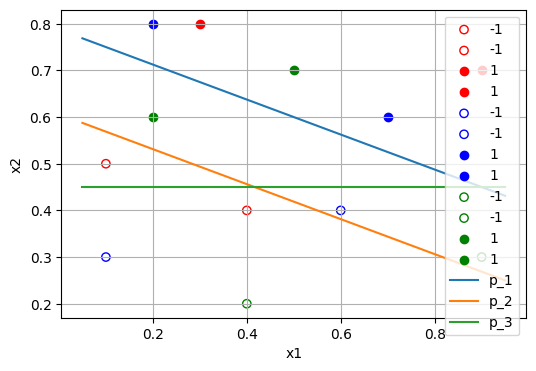

In [4]:
visualize_result(problem_instance)

In [12]:
problem_instance.w_j.value

array([[ 7.50000000e-01,  2.00000000e+00, -1.07500000e+00],
       [ 6.97674418e-01,  1.86046512e+00, -6.27906977e-01],
       [-1.39351615e-10,  2.00000000e+00, -4.00000000e-01]])

In [6]:
problem_instance.xi_h.value

array([[0.],
       [0.]])

In [9]:
problem_instance.xi_jl.value

array([[2.05416202e-12, 2.50000000e-02, 2.50000000e-01, 0.00000000e+00],
       [0.00000000e+00, 5.34883721e-01, 0.00000000e+00, 2.32558140e-02],
       [6.18647558e-11, 2.00000000e-01, 2.00000000e-01, 1.93230835e-11]])